In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report

In [3]:
df = pd.read_csv('./datasets/18k_projects.csv',low_memory=False)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18142 entries, 0 to 18141
Data columns (total 35 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Id                              18142 non-null  int64  
 1   Name                            18142 non-null  object 
 2   Url                             18142 non-null  object 
 3   State                           18142 non-null  object 
 4   Currency                        18142 non-null  object 
 5   Top Category                    18142 non-null  object 
 6   Category                        18142 non-null  object 
 7   Creator                         18142 non-null  object 
 8   Location                        18142 non-null  object 
 9   Updates                         18142 non-null  int64  
 10  Comments                        18142 non-null  int64  
 11  Rewards                         18142 non-null  int64  
 12  Goal                            

In [6]:
del df['Id']
del df['Name']
del df['Url']
del df['Location']
del df['Pledged']
del df['Creator']
del df['Category']
del df['Updates']
del df['Start']
del df['End']
del df['Latitude']
del df['Longitude']
del df['Start Timestamp (UTC)']
del df['End Timestamp (UTC)']
del df['Creator Bio']
del df['Creator Website']

In [8]:
df = pd.get_dummies(df, columns=['State','Currency','Top Category','Facebook Connected','Has Video'])

In [9]:
df.shape

(18142, 41)

In [10]:
df.isnull().sum()

Comments                             0
Rewards                              0
Goal                                 0
Backers                              0
Duration in Days                     0
Facebook Friends                  5852
Facebook Shares                      0
Creator - # Projects Created         0
Creator - # Projects Backed       4244
# Videos                           101
# Images                             0
# Words (Description)                0
# Words (Risks and Challenges)     101
# FAQs                               0
State_failed                         0
State_successful                     0
Currency_AUD                         0
Currency_CAD                         0
Currency_EUR                         0
Currency_GBP                         0
Currency_NZD                         0
Currency_USD                         0
Top Category_Art                     0
Top Category_Comics                  0
Top Category_Crafts                  0
Top Category_Dance       

In [12]:
df['State_successful'].corr(df['Facebook Friends'])

0.15954024784972817

In [13]:
df['State_successful'].corr(df['Creator - # Projects Backed'])

0.10624973985586757

In [14]:
df['State_successful'].corr(df['# Videos'])

0.056579190784304276

In [15]:
df['State_successful'].corr(df['# Words (Risks and Challenges)'])

0.007544860569767823

In [16]:
df.describe()

,Comments,Rewards,Goal,Backers,Duration in Days,Facebook Friends,Facebook Shares,Creator - # Projects Created,Creator - # Projects Backed,# Videos,...,Top Category_Journalism,Top Category_Music,Top Category_Photography,Top Category_Publishing,Top Category_Technology,Top Category_Theater,Facebook Connected_No,Facebook Connected_Yes,Has Video_No,Has Video_Yes
count,18142.000000,18142.000000,1.814200e+04,18142.000000,18142.000000,12290.000000,18142.000000,18142.000000,13898.000000,18041.000000,...,18142.000000,18142.000000,18142.000000,18142.000000,18142.000000,18142.000000,18142.000000,18142.000000,18142.000000,18142.000000
mean,34.243027,10.042002,2.653121e+04,138.070279,31.398468,694.233686,396.729137,1.520119,5.149950,0.226207,...,0.004024,0.150590,0.029655,0.113053,0.054404,0.035663,0.322566,0.677434,0.170268,0.829732
std,539.161283,5.889806,7.583874e+05,633.787780,10.058827,783.802343,2544.711314,2.540474,20.351979,0.877530,...,0.063308,0.357658,0.169638,0.316666,0.226820,0.185454,0.467471,0.467471,0.375878,0.375878
min,0.000000,2.000000,1.000000e+02,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,6.000000,2.000000e+03,7.000000,29.000000,216.250000,21.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,0.000000,9.000000,5.000000e+03,29.000000,30.000000,453.000000,104.000000,1.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
75%,3.000000,12.000000,1.500000e+04,89.000000,32.000000,860.000000,322.000000,1.000000,4.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000
max,30341.000000,131.000000,1.000000e+08,35383.000000,60.000000,4885.000000,260505.000000,111.000000,1205.000000,24.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


/Users/chetan/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Facebook Friends', ylabel='Density'>

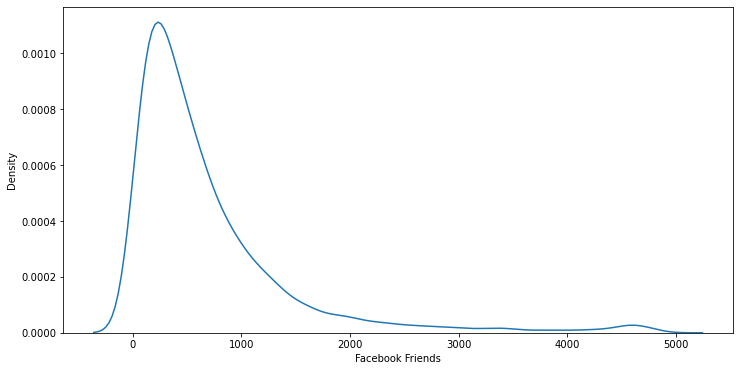

In [21]:
#distribution plot of variable 'Facebook friends'
plt.figure(figsize=(12,6))
sns.distplot(df['Facebook Friends'],kde=True, hist=0)

/Users/chetan/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Creator - # Projects Backed', ylabel='Density'>

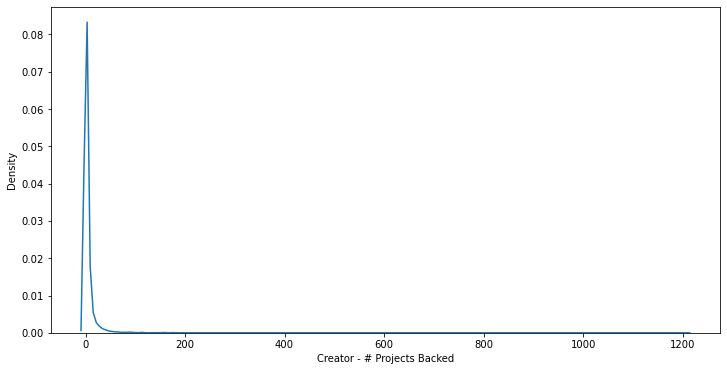

In [24]:
#distribution plot of variable 'Creator - #projects backed'
plt.figure(figsize=(12,6))
sns.distplot(df['Creator - # Projects Backed'],kde=True, hist=0)

In [25]:
#fill missing values for 'Creator - # Projects Backed' with kmean value
df['Creator - # Projects Backed'].fillna(df['Creator - # Projects Backed'].mean(), inplace=True)

In [27]:
#drop remaining missing values for remaining variables
df.dropna(axis=0, how='any',thresh=None, subset=None, inplace=True)

In [30]:
df.shape

(12215, 41)

In [32]:
del df['State_failed']

In [33]:
X = df.drop('State_successful',axis=1)
y = df['State_successful']

In [34]:
y.shape

(12215,)

In [36]:
X.shape

(12215, 39)

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=10, shuffle=True)

model = LogisticRegression(solver='lbfgs', max_iter=10000)
model.fit(X_train, y_train)

model_predict = model.predict(X_test)

#confusion matrix 
print(confusion_matrix(y_test,model_predict))

#classification report
print(classification_report(y_test, model_predict))

new_project = [ 0, #Comments
9, #Rewards 
2500, #Goal
157, #Backers
31, #Duration in Days
319, #Facebook Friends
110, #Facebook Shares
1, #Creator - # Projects Created
0, #Creator - # Projects Backed 
0, ## Videos
12, ## Images 
872, ## Words (Description) 
65, ## Words (Risks and Challenges) 
0, ## FAQs 
0, #Currency_AUD
1, #Currency_CAD 
0, #Currency_EUR 
0, #Currency_GBP 
0, #Currency_NZD 
0, #Currency_USD
0, #Top Category_Art 
0, #Top Category_Comics 
0, #Top Category_Crafts 
0, #Top Category_Dance 
0, #Top Category_Design 
0, #Top Category_Fashion
1, #Top Category_Film & Video 
0, #Top Category_Food 
0, #Top Category_Games 
0, #Top Category_Journalism 
0, #Top Category_Music 
0, #Top Category_Photography 
0, #Top Category_Publishing 
0, #Top Category_Technology 
0, #Top Category_Theater 
0, #Facebook Connected_No 
0, #Facebook Connected_Yes 
0, #Has Video_No 
1, #Has Video_Yes
]


predict = model.predict([new_project])
predict

[[1627  202]
 [ 230 1606]]
              precision    recall  f1-score   support

           0       0.88      0.89      0.88      1829
           1       0.89      0.87      0.88      1836

    accuracy                           0.88      3665
   macro avg       0.88      0.88      0.88      3665
weighted avg       0.88      0.88      0.88      3665



array([1], dtype=uint8)